# Part A:

In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import seaborn as sns
import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# visulization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Building the training data

In [2]:
# x = []
# y = []
# value = []
# for i in range(1000):
#     randX = random.randint(-10000, 10000)
#     randY = random.randint(-10000, 10000)
#     x.append(randX/100)
#     y.append(randY/100)
#     if y[i] > 1:
#         value.append(1)
#     else:
#         value.append(-1)

# end = {'x': x, 'y': y, 'value': value}
# df= pd.DataFrame(data=end,
#                 columns = ['x', 'y', 'value'])

In [3]:
# df.to_csv(r'C:\Users\talia\NeuroComputation\trainingDF.csv', index = False)

## Building the first test data

In [4]:
# x = []
# y = []
# value = []
# for i in range(1000):
#     randX = random.randint(-10000, 10000)
#     randY = random.randint(-10000, 10000)
#     x.append(randX/100)
#     y.append(randY/100)
#     if y[i] > 1:
#         value.append(1)
#     else:
#         value.append(-1)

# end = {'x': x, 'y': y, 'value': value}
# df= pd.DataFrame(data=end,
#                 columns = ['x', 'y', 'value'])

In [5]:
# df.to_csv(r'C:\Users\talia\NeuroComputation\firstTestDF.csv', index = False)

## Building the second test data

In [6]:
# x = []
# y = []
# value = []
# for i in range(1000):
#     randX = random.randint(-10000, 10000)
#     randY = random.randint(-10000, 10000)
#     x.append(randX/100)
#     y.append(randY/100)
#     if y[i] > 1:
#         value.append(1)
#     else:
#         value.append(-1)

# end = {'x': x, 'y': y, 'value': value}
# df= pd.DataFrame(data=end,
#                 columns = ['x', 'y', 'value'])

In [7]:
# df.to_csv(r'C:\Users\talia\NeuroComputation\secondTestDF.csv', index = False)

### DataFrames:

In [8]:
train = pd.read_csv(r'C:\Users\talia\NeuroComputation\trainingDF.csv')
first_test = pd.read_csv(r'C:\Users\talia\NeuroComputation\firstTestDF.csv')
second_test = pd.read_csv(r'C:\Users\talia\NeuroComputation\secondTestDF.csv')

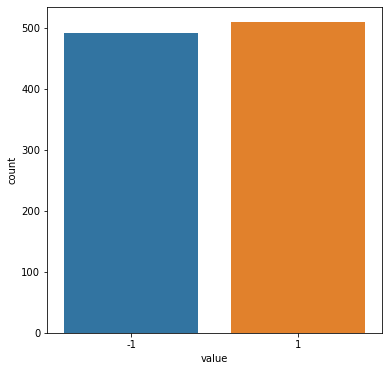

In [9]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = train)

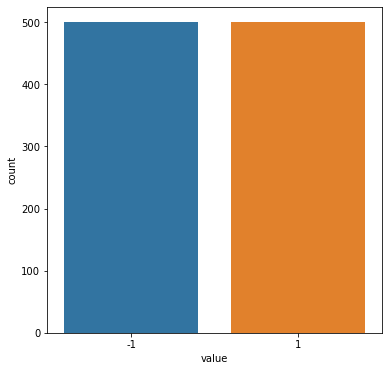

In [10]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = first_test)

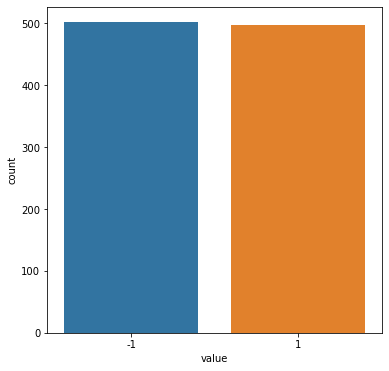

In [11]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = second_test)

## Adaline Algorithm:

In [106]:
def weight_genarate():
    weight = []
    for i in range(2):
        random.seed(i)
        rand = random.uniform(0, 0.1)
        weight.append(rand)
        
    random.seed(4)
    bias = random.uniform(0, 0.1)
    return weight, bias

In [107]:
# activate 
def activate(x, y, bias, weight):
    return (bias + x*weight[0] + y*weight[1]) 

In [114]:
# error calculation:    
def error_calc(predicted, expected):
    error = (expected - predicted) ** 2
    return error

In [119]:
def adaline_algo(learning_rate, train):
    EPS = 0.005
    weight, bias = weight_genarate()
    
    for index, row in train.iterrows():
        predicted = activate(row['x'], row['y'], bias, weight)
        
        # update:
        weight[0] = (weight[0] + learning_rate*(row['value'] - predicted)*row['x'])
        weight[1] = (weight[1] + learning_rate*(row['value'] - predicted)*row['y'])
        bias = bias + learning_rate * (row['value'] - predicted)
        
        # error calc
        error = error_calc(predicted, row['value'])
        print(error)
        if error <= EPS or error == 0:
            break
        
    return weight, bias

In [120]:
adaline_algo(0.001, train)

36.243016979515644
368.736797806396
643.1184938556601
2079.479956026219
10040.157807021036
17853.24306447495
873740.3056761267
50154026.45668635
183991813.22448352
461958685.3444332
79981399.11946481
15677276913.198135
159039551.69279695
410580984664.7453
8999966692075.691
152830819081879.03
593089876153597.4
315589366933452.3
5202173790828253.0
6.345519501889342e+16
2.266702413639261e+16
1.0292467162675451e+17
3.157611864777548e+18
3.215039870194754e+20
7.232183814821355e+20
2.142978000085185e+22
2.2324440117491906e+23
3.4046281700176833e+22
8.520313884494794e+23
4.6421838361320567e+23
7.403342012683578e+24
1.4506672772628216e+24
1.9560423807746235e+24
1.4616281220001881e+26
1.7700443607585988e+27
5.145527303228831e+27
1.1638754808568125e+30
2.3409565229944423e+31
8.387391494385407e+31
8.86667871152385e+31
9.405232760163431e+32
2.253656859321202e+34
8.206197066760673e+34
1.379031399769998e+33
2.2976781218918164e+34
3.184189553469486e+36
5.954361612848435e+37
2.0211526039007303e+39
2.8

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


([nan, nan], nan)